Imports

In [307]:
import pandas as pd
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

Data set - loading and formatting to tensorflow

In [308]:
df = pd.read_csv("loan_approval_dataset.csv")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB
None


In [309]:
#mString values to binary 0/1
print("."+df[" self_employed"][0]+".")
df[" education"].replace((" Graduate", " Not Graduate"), (1, 0), inplace = True)
df[" self_employed"].replace((" Yes", " No"), (1, 0), inplace = True)
df[" loan_status"].replace((" Approved", " Rejected"), (1, 0), inplace = True)
print(df.head())

. No.
   loan_id   no_of_dependents   education   self_employed   income_annum  \
0        1                  2           1               0        9600000   
1        2                  0           0               1        4100000   
2        3                  3           1               0        9100000   
3        4                  3           1               0        8200000   
4        5                  5           0               1        9800000   

    loan_amount   loan_term   cibil_score   residential_assets_value  \
0      29900000          12           778                    2400000   
1      12200000           8           417                    2700000   
2      29700000          20           506                    7100000   
3      30700000           8           467                   18200000   
4      24200000          20           382                   12400000   

    commercial_assets_value   luxury_assets_value   bank_asset_value  \
0                  17600000     

In [310]:
y = np.array(df.pop(" loan_status"))
X = np.array(df)
print(X[:3], end = "\n\n")
print(y[:3])

[[       1        2        1        0  9600000 29900000       12      778
   2400000 17600000 22700000  8000000]
 [       2        0        0        1  4100000 12200000        8      417
   2700000  2200000  8800000  3300000]
 [       3        3        1        0  9100000 29700000       20      506
   7100000  4500000 33300000 12800000]]

[1 0 0]


In [311]:
#normalization
norm_l = tf.keras.layers.Normalization(axis=-1)
norm_l.adapt(X)
X = norm_l(X)
print(X[:3])

tf.Tensor(
[[-1.731644   -0.2941017   0.9955592  -1.0072889   1.6179793   1.6330512
   0.19261707  1.0327921  -0.7800577   2.8772893   0.8320282   0.9303036 ]
 [-1.7308326  -1.4735477  -1.0044609   0.9927641  -0.3417488  -0.32441428
  -0.5080903  -1.0610521  -0.73392427 -0.6319209  -0.69499326 -0.5159369 ]
 [-1.7300211   0.2956213   0.9955592  -1.0072889   1.4398222   1.610933
   1.5940318  -0.54484123 -0.05730043 -0.10781809  1.9965193   2.4073153 ]], shape=(3, 12), dtype=float32)


In [312]:
ratio_test = 0.1
ratio_train = 1 - ratio_test
X_train, X_test, y_train, y_test = X[:int(len(X)*ratio_train)], X[int(len(X)*ratio_train):], y[:int(len(y)*ratio_train)], y[int(len(y)*ratio_train):]
print("X_train shape :", X_train.shape)
print("X_test shape :", X_test.shape)
print("y_train shape :", y_train.shape)
print("y_test shape :", y_test.shape)

X_train shape : (3842, 12)
X_test shape : (427, 12)
y_train shape : (3842,)
y_test shape : (427,)


Tensorflow

In [313]:
model = Sequential([
    tf.keras.Input(shape=(12,)),
    Dense(20, activation = "sigmoid"),
    Dense(12, activation = "sigmoid"),
    Dense(6, activation = "sigmoid"),
    Dense(1, activation = "sigmoid")
])
model.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_85 (Dense)            (None, 20)                260       
                                                                 
 dense_86 (Dense)            (None, 12)                252       
                                                                 
 dense_87 (Dense)            (None, 6)                 78        
                                                                 
 dense_88 (Dense)            (None, 1)                 7         
                                                                 
Total params: 597 (2.33 KB)
Trainable params: 597 (2.33 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [314]:
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.008),
)

history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 100)

Epoch 1/100
121/121 [==============================] - 1s 766us/step - loss: 0.5876 - val_loss: 0.2894
Epoch 2/100
121/121 [==============================] - 0s 404us/step - loss: 0.2209 - val_loss: 0.1725
Epoch 3/100
121/121 [==============================] - 0s 384us/step - loss: 0.1908 - val_loss: 0.1603
Epoch 4/100
121/121 [==============================] - 0s 388us/step - loss: 0.1823 - val_loss: 0.1578
Epoch 5/100
121/121 [==============================] - 0s 373us/step - loss: 0.1791 - val_loss: 0.1585
Epoch 6/100
121/121 [==============================] - 0s 395us/step - loss: 0.1761 - val_loss: 0.1622
Epoch 7/100
121/121 [==============================] - 0s 385us/step - loss: 0.1753 - val_loss: 0.1489
Epoch 8/100
121/121 [==============================] - 0s 367us/step - loss: 0.1768 - val_loss: 0.1491
Epoch 9/100
121/121 [==============================] - 0s 367us/step - loss: 0.1752 - val_loss: 0.1538
Epoch 10/100
121/121 [==============================] - 0s 372us/step - l

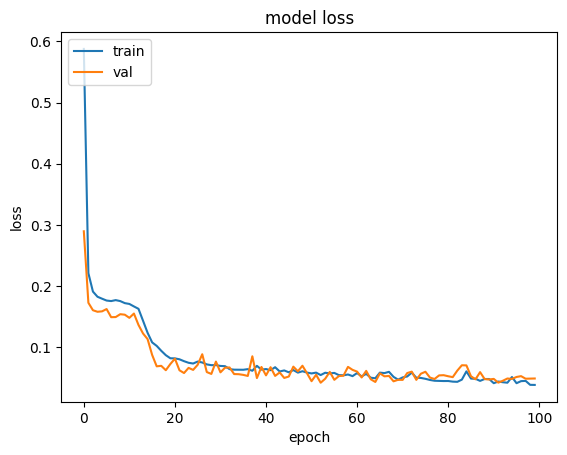

In [315]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()